<a href="https://colab.research.google.com/github/clyde2020/ML_Portfolio/blob/main/Kaggle_Histopathologic_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import os
import shutil
from shutil import copyfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

In [22]:
df = pd.read_csv('/content/train_labels.csv')

In [24]:
len(df.id)

220025

In [25]:
picdict = dict(zip(df['id'], df['label']))

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
def match_label(batch):
  y = []
  for item in batch:
    lab = os.path.splitext(os.path.basename(item))[0]
    y.append(picdic[lab])
  
  return y

In [6]:
os.mkdir('/content/Lymph')
os.mkdir('/content/Lymph/Noncancer')
os.mkdir('/content/Lymph/Cancer')

In [27]:
source_folder = '/content/gdrive/MyDrive/small_set'
benign_folder = '/content/Lymph/Noncancer'
mal_folder = '/content/Lymph/Cancer'
train_folder = '/content/Lymph'

In [28]:
new_list = os.listdir(source_folder)

for fname in new_list:
  origin = os.path.join(source_folder, fname)
  name = os.path.splitext(os.path.basename(fname))[0]
  if os.path.getsize(origin) > 1:
    if picdict[name] == 0:
      destination = os.path.join(benign_folder, fname)
      shutil.copy(origin, benign_folder)
    else:
      shutil.copy(origin, mal_folder)

In [29]:
print(len(os.listdir(benign_folder)))
print(len(os.listdir(mal_folder)))

42
22


In [32]:
train_datagen = ImageDataGenerator(rescale=1/255.0,
                                  rotation_range=45,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(96, 96),
    batch_size=10,
    class_mode='binary')

Found 64 images belonging to 2 classes.


In [39]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, input_shape=(96, 96, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(96, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
                          
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(350, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10**(epoch / 5))
#optimizer = tf.keras.optimizers.Adam(learning_rate=1e-7)
#model.compile(loss=tf.keras.losses.Huber(),
#              optimizer=optimizer,
#              metrics=["mae"])


model.compile(optimizer=RMSprop(learning_rate=1e-4), loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 47, 47, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 20, 20, 96)        55392     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 10, 10, 96)      

In [40]:
history = model.fit_generator(train_generator,
                              epochs=20,
                              verbose=1,
                              callbacks=lr_schedule)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/20
7/7 [==============================] - 2s 183ms/step - loss: 0.7282 - acc: 0.6562 - lr: 1.0000e-04
Epoch 2/20
7/7 [==============================] - 1s 185ms/step - loss: 0.6766 - acc: 0.6562 - lr: 1.5849e-04
Epoch 3/20
7/7 [==============================] - 1s 198ms/step - loss: 0.6530 - acc: 0.6562 - lr: 2.5119e-04
Epoch 4/20
7/7 [==============================] - 1s 185ms/step - loss: 0.7163 - acc: 0.5938 - lr: 3.9811e-04
Epoch 5/20
7/7 [==============================] - 1s 181ms/step - loss: 0.7061 - acc: 0.6562 - lr: 6.3096e-04
Epoch 6/20
7/7 [==============================] - 1s 196ms/step - loss: 0.7968 - acc: 0.6250 - lr: 0.0010
Epoch 7/20
7/7 [==============================] - 1s 183ms/step - loss: 0.6408 - acc: 0.6562 - lr: 0.0016
Epoch 8/20
7/7 [==============================] - 1s 183ms/step - loss: 0.9003 - acc: 0.6562 - lr: 0.0025
Epoch 9/20
7/7 [==============================] - 1s 181ms/step - loss: 1.4749 - acc: 0.4375 - lr: 0.0040
Epoch 10/20
7/7 [=========

(0.0001, 1.0, 0.0, 10.0)

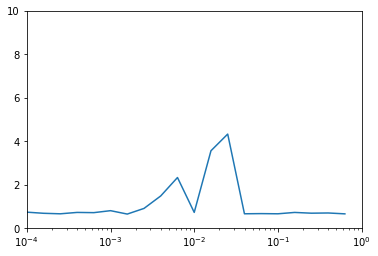

In [42]:
import matplotlib.pyplot as plt

plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-4, 1e-0, 0, 10])